In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [23]:
# Загрузка данных
images = np.load("D:\\notebooks\\mds-misis-dl-captchan\\images.npy")
labels = np.load("D:\\notebooks\\mds-misis-dl-captchan\\labels.npy")

print(images.shape)
print(labels.shape)

(20000, 48, 48, 3)
(20000,)


In [24]:
# Нормализация
images = images / 255.0

# One-hot кодирование меток
labels = tf.keras.utils.to_categorical(labels, num_classes=26)

# Разделение на train и val выборки
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [25]:
# Создание модели
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(26, activation='softmax')
])

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_6 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 18, 18, 128)      

In [27]:
# остановка если val_accuracy на протяжении 5 эпох не меняется
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
)

Epoch 1/20
500/500 [==============================] - 5s 10ms/step - loss: 3.2318 - accuracy: 0.0761 - val_loss: 2.7497 - val_accuracy: 0.2002
Epoch 2/20
500/500 [==============================] - 5s 10ms/step - loss: 1.8097 - accuracy: 0.4437 - val_loss: 1.2043 - val_accuracy: 0.6315
Epoch 3/20
500/500 [==============================] - 5s 9ms/step - loss: 0.9316 - accuracy: 0.7139 - val_loss: 0.9668 - val_accuracy: 0.7120
Epoch 4/20
500/500 [==============================] - 4s 9ms/step - loss: 0.6505 - accuracy: 0.7986 - val_loss: 0.5566 - val_accuracy: 0.8322
Epoch 5/20
500/500 [==============================] - 5s 9ms/step - loss: 0.4896 - accuracy: 0.8497 - val_loss: 0.5217 - val_accuracy: 0.8367
Epoch 6/20
500/500 [==============================] - 5s 9ms/step - loss: 0.4006 - accuracy: 0.8752 - val_loss: 0.4667 - val_accuracy: 0.8562
Epoch 7/20
500/500 [==============================] - 5s 9ms/step - loss: 0.3130 - accuracy: 0.9010 - val_loss: 0.4699 - val_accuracy: 0.8595
Epoc

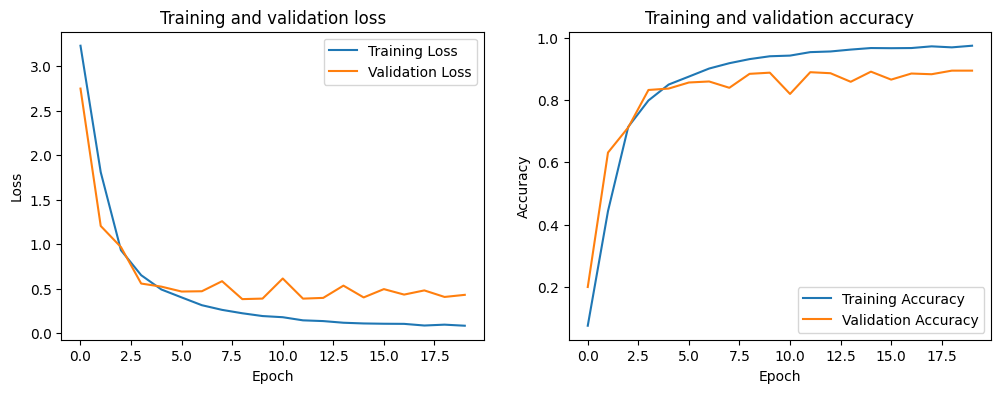

In [28]:
# Визуализация метрик
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [29]:
# Загрузка выборки для предсказания
images_sub = np.load("D:\\notebooks\\mds-misis-dl-captchan\\images_sub.npy")
# Нормализация
images_sub = images_sub / 255.0
# Предсказания
predictions = model.predict(images_sub)
predicted_classes = predictions.argmax(axis=1)

# Создание submission.csv
submission = pd.DataFrame({
    'Id': range(len(predicted_classes)),
    'Category': predicted_classes
})
submission.to_csv('D:\\notebooks\\mds-misis-dl-captchan\\submission.csv', index=False)

1563/1563 [==============================] - 3s 2ms/step
